In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()                   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

# observation
1.There are 1599 rows and 12 columns in the dataset.
2.Out of 12 columns ,11 are feature and other is label.
Let's explore more

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Observation
1.There are 11 independent variables in this dataset and all are continous.
2.There is 1 dependent variable in this dataset and is categorical type,i.e label is quality.
3.There is no null value present in this dataset.
let's observe more

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Observation
1.in fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol we have data which is right skewed because mean > median.
2.in some cases max value is very much high,that means there are some outliers present in the data.
3.in volatile acidity , density ,pH data seems to be normally distributed.
4.we can also chech std,mean, median etc.
Let's do graphical analysis.

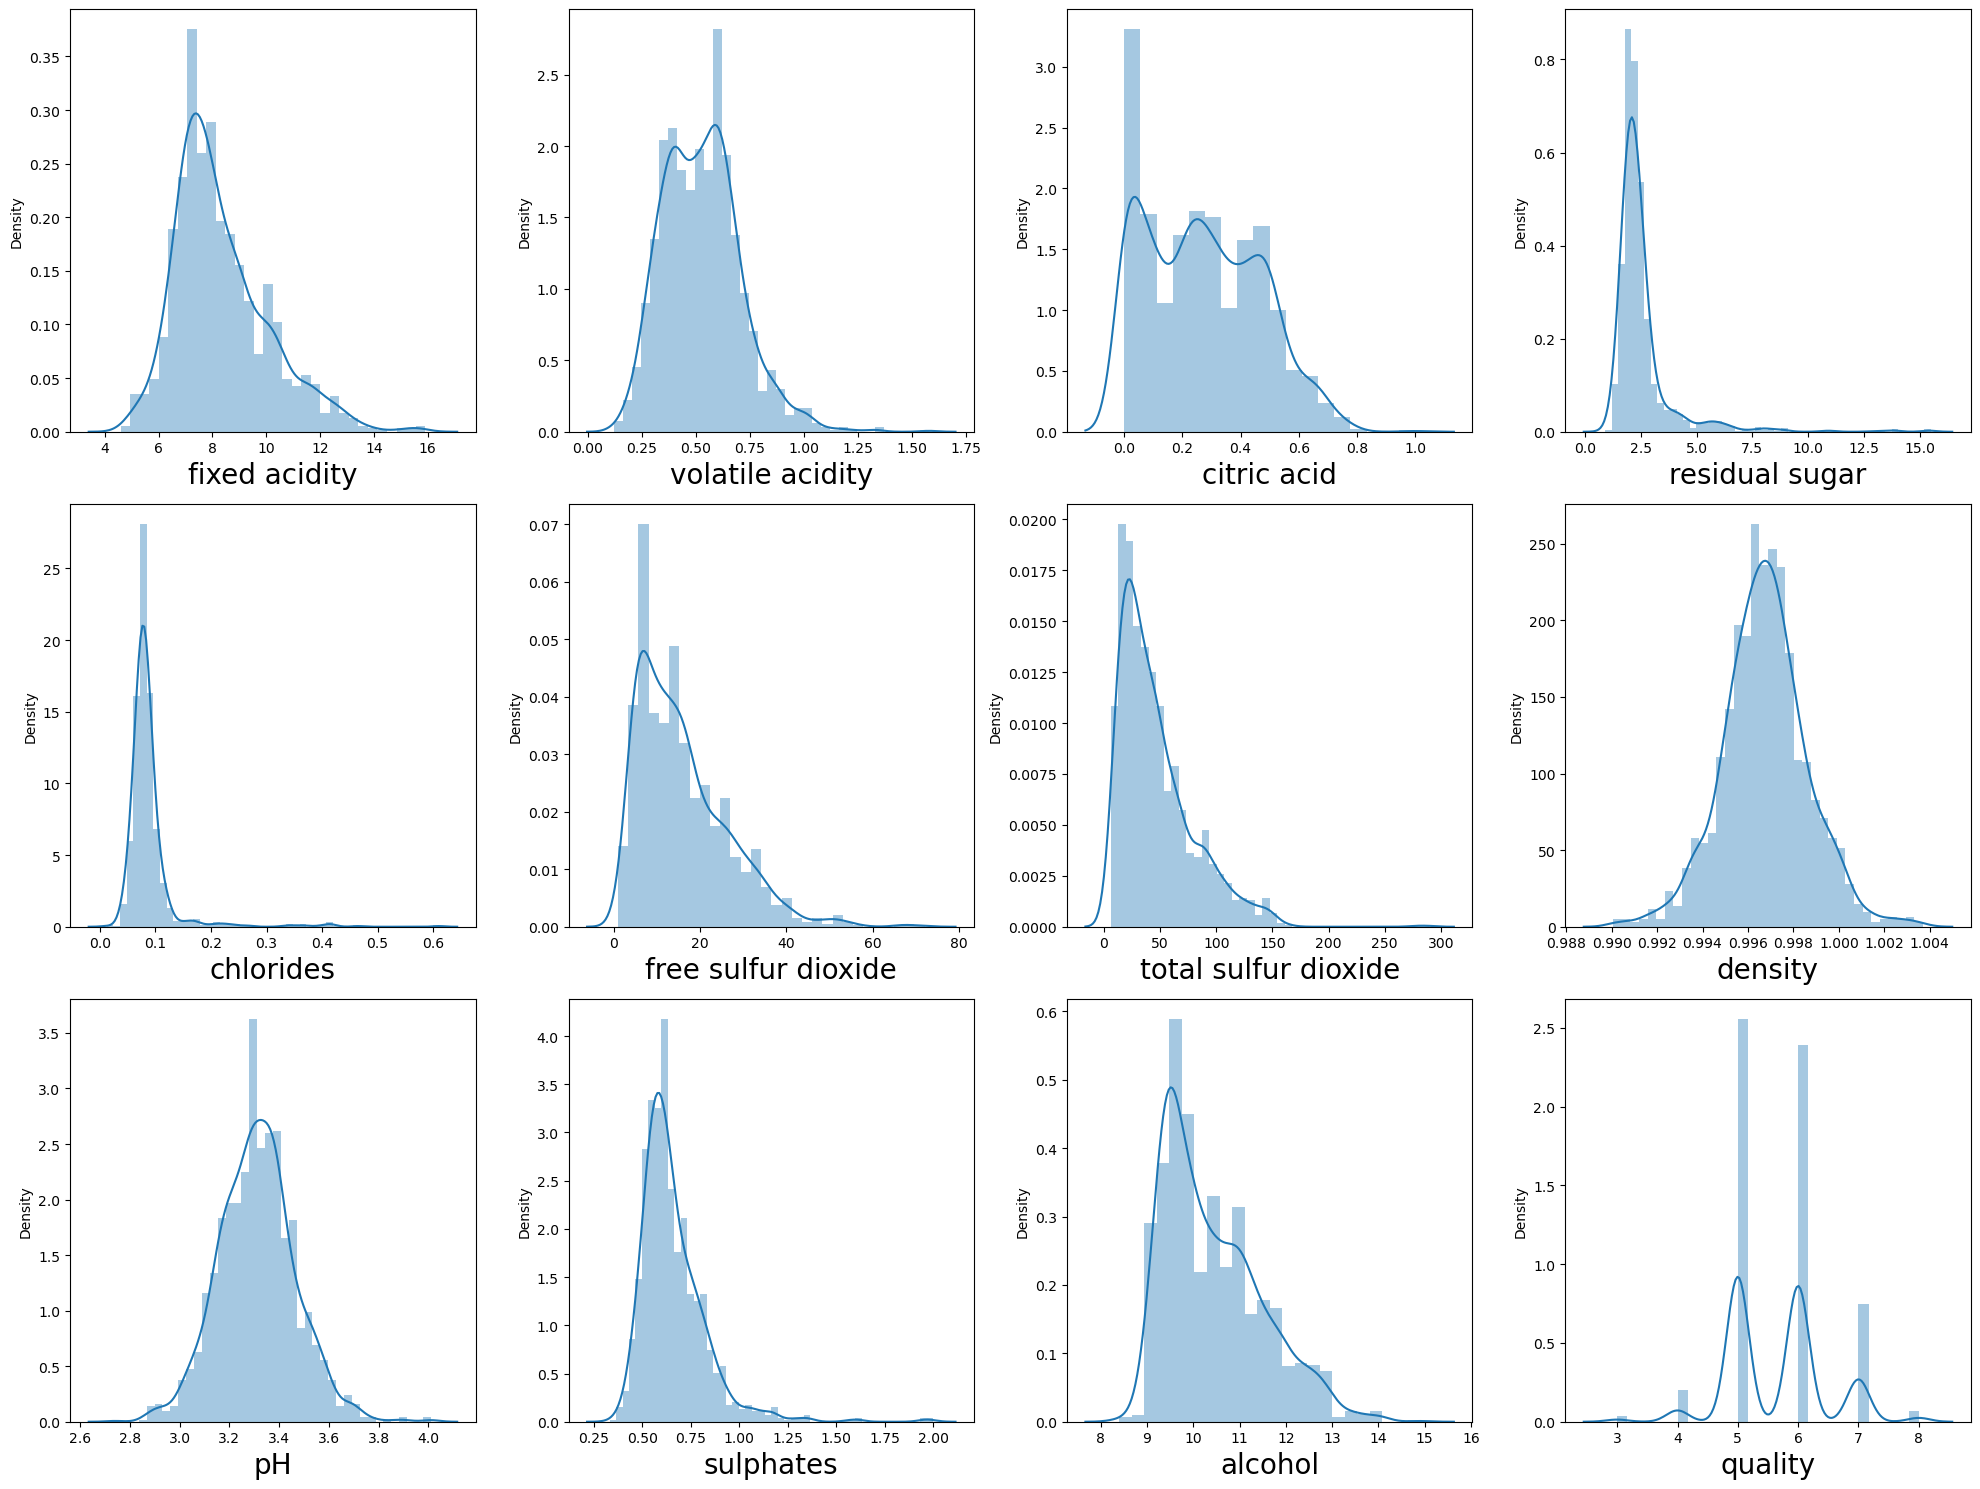

In [7]:
#lets see how data is distributed for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
1.We can see data is normally distributed but have some skewness and ouliers present in it.
Let's check more with the help of other graphs

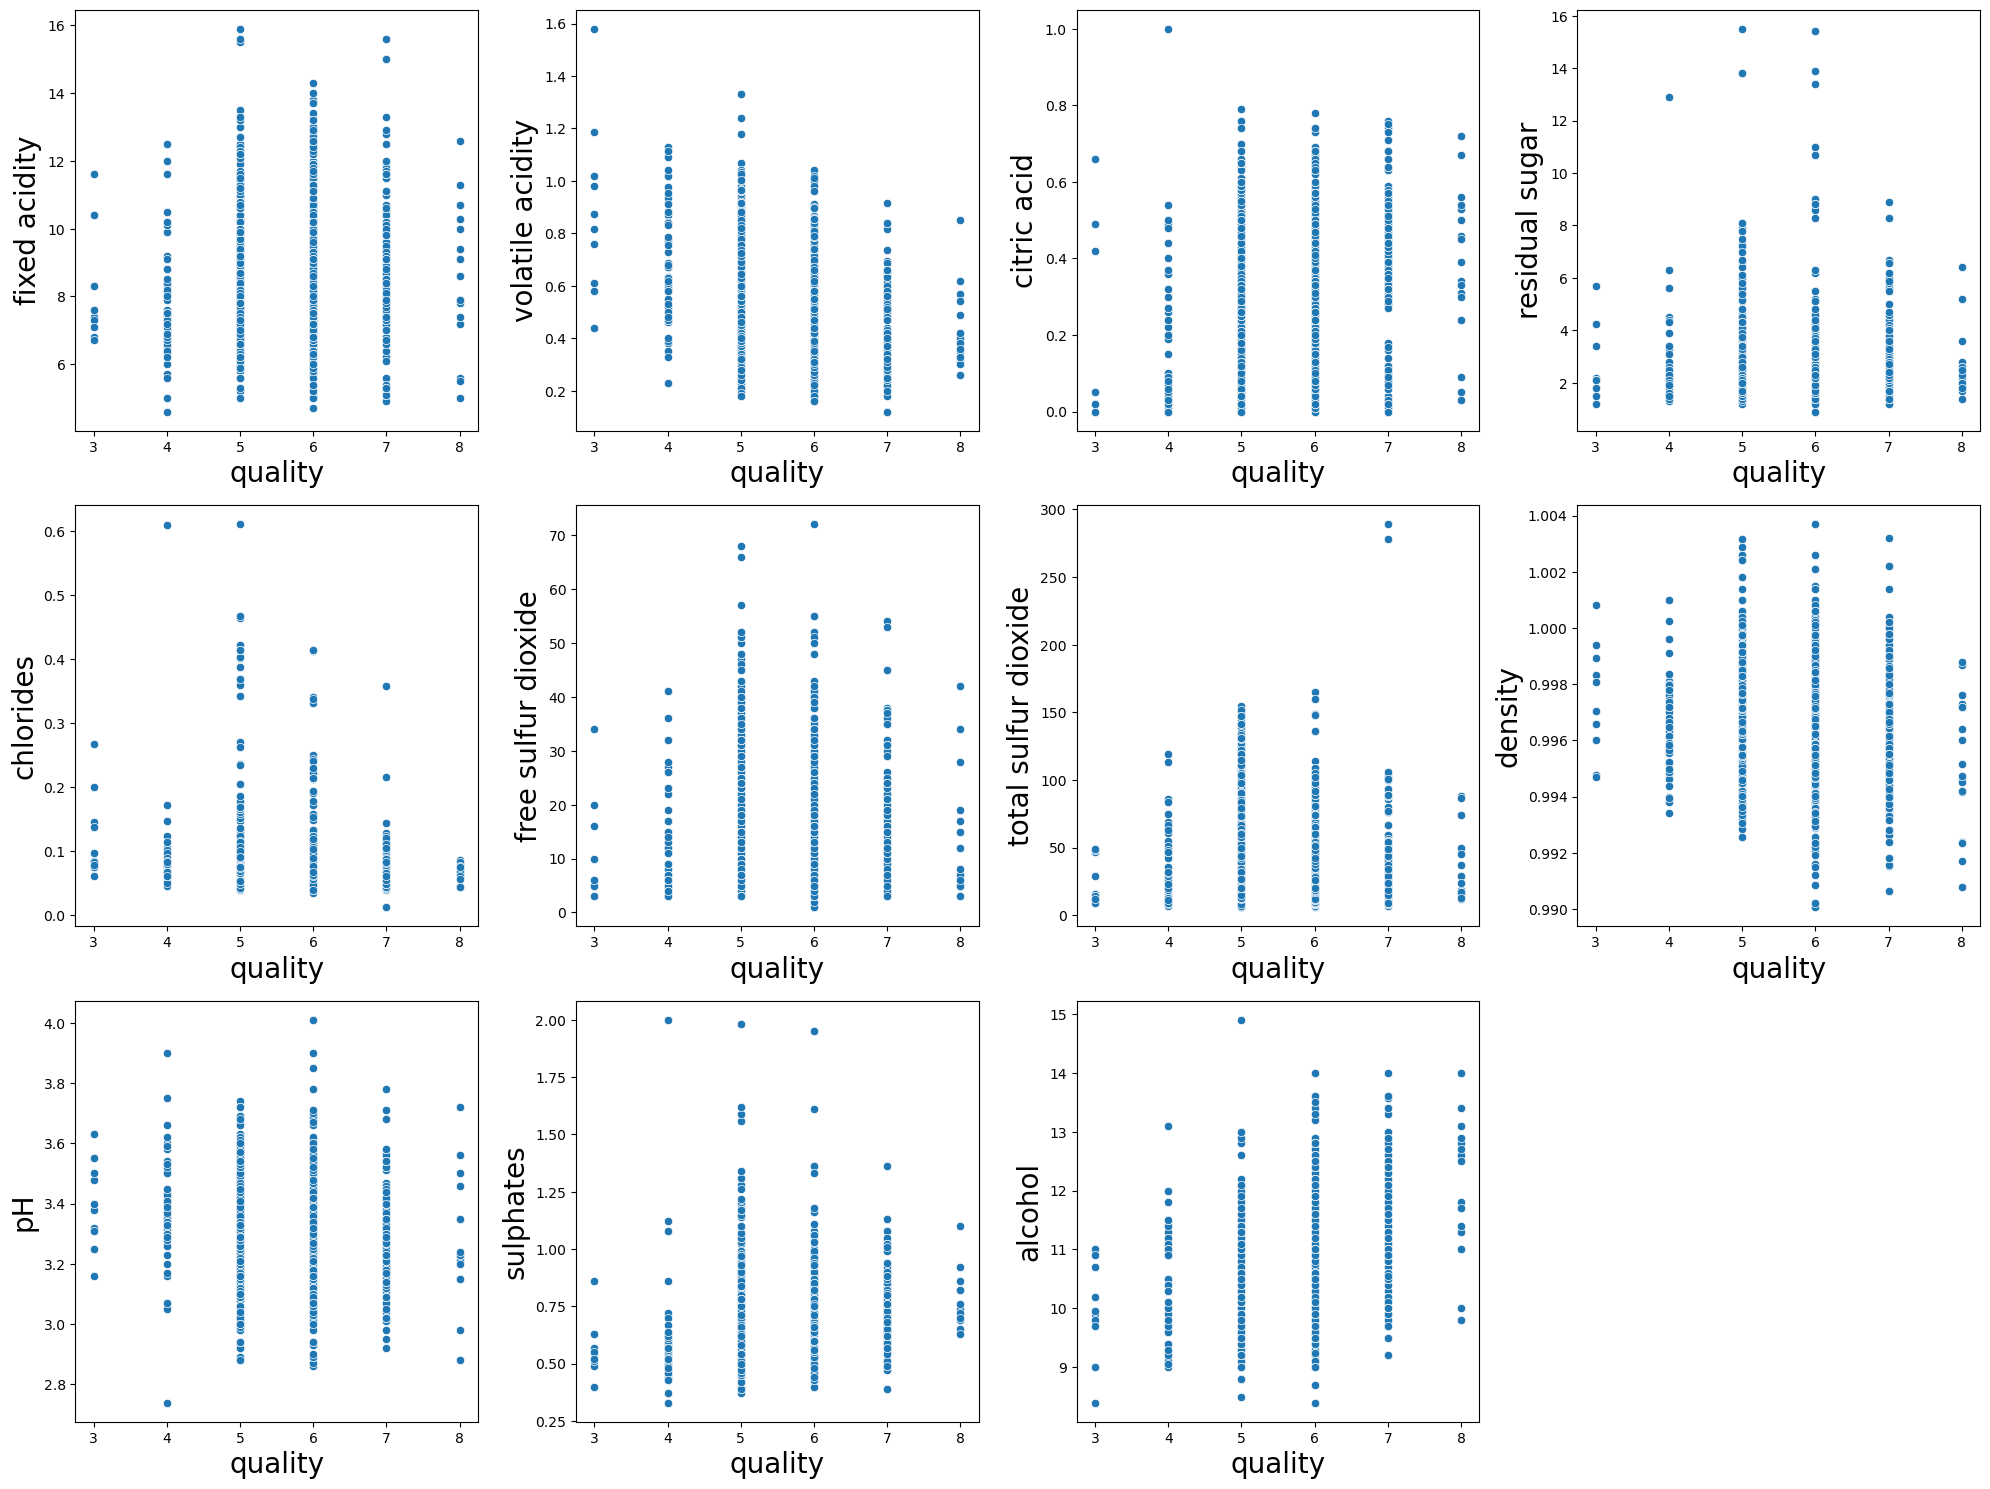

In [8]:
#lets see relation of features with label
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.scatterplot(data['quality'],data[col])
        plt.xlabel('quality', fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Observation
We can see from the graph that all features are in relation with label

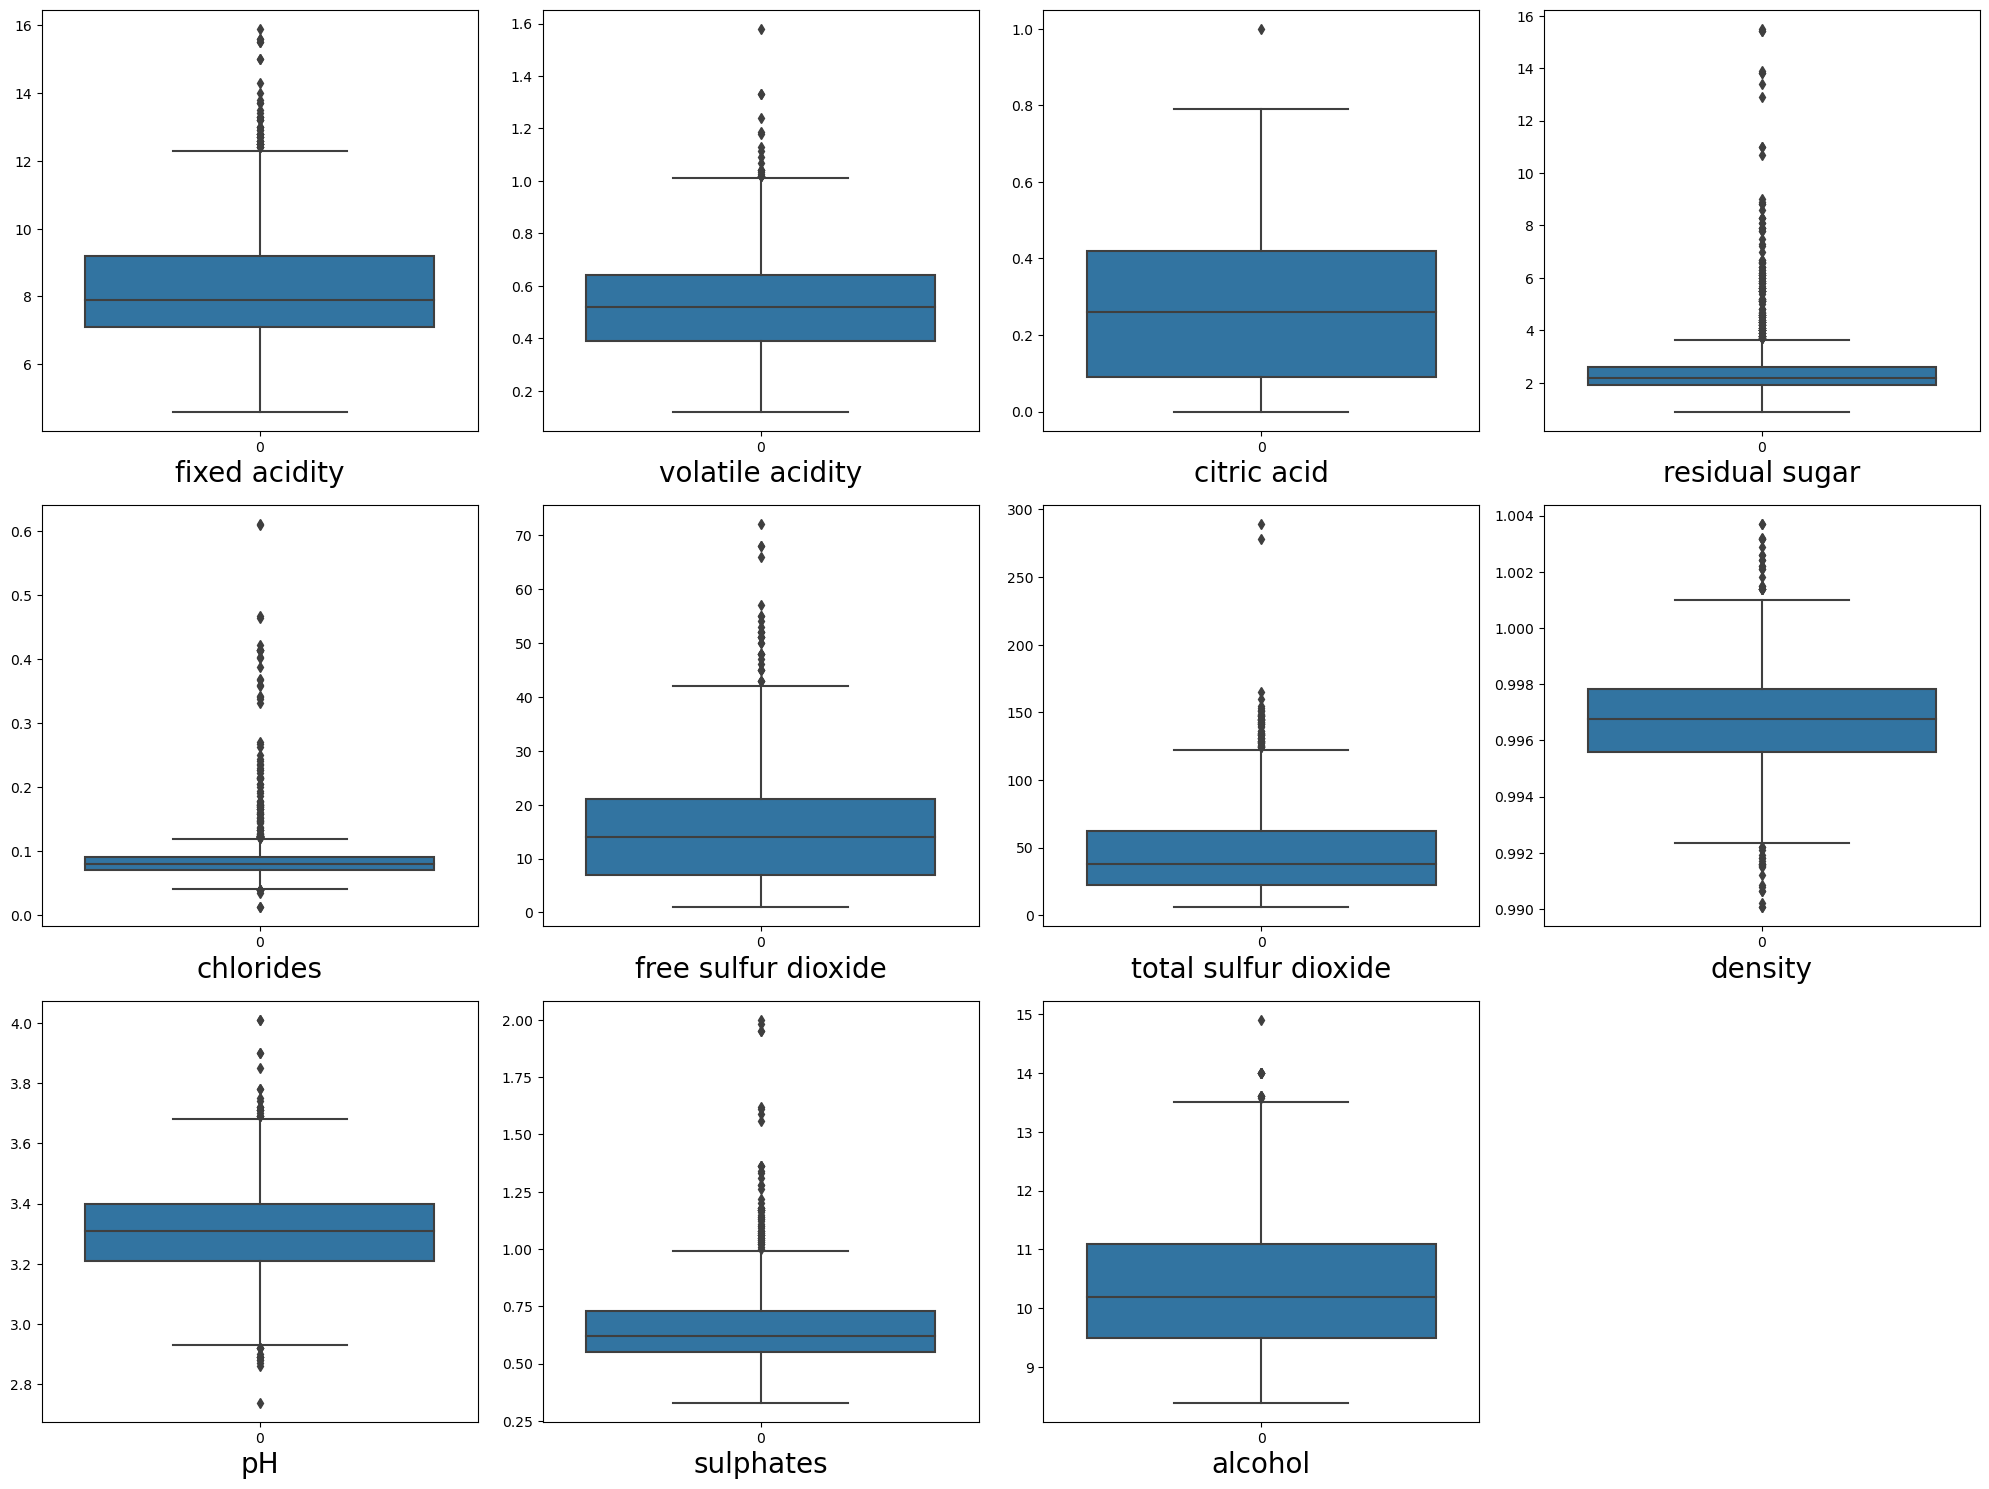

In [9]:
#lets see outliers for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data:
    if plotnumber<=11:
        plt.subplot(3,4,plotnumber)
        ax = sns.boxplot(data=data[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
now we can clearly see that there are outliers present in the features.

In [10]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

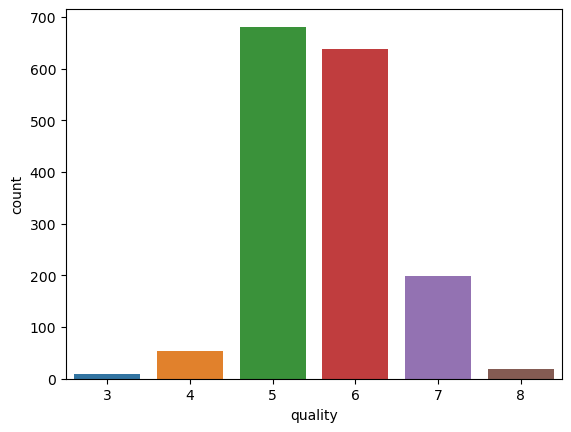

In [11]:
sns.countplot(x='quality',data=data)
plt.show()

In [12]:
data['quality']=data['quality'].replace({'3':0,'4':0,'5':0,'6':0,'7':1,'8':1})

In [13]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
data['quality'].nunique()

6

In [15]:
data['quality'] = [1 if x >= 7 else 0 for x in data['quality']]

In [16]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# Observation
Here we have replaced wine quality 7 or above as good one i.e with 1 and rest as of low or avg quality i.e with 0.
This was asked in question to do, now we can observe that data is imbalanced.
We will balance this ahead.
Now it becomes a binary classification problem

In [17]:
#Let's use zscre tech to remove outliers
from scipy.stats import zscore

In [18]:
columns=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
z_score=np.abs(zscore(columns))
z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [19]:
np.where(z_score>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
         557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
         649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
         695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
         889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
        1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
        1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
        1270, 1270, 1288, 1289, 1295, 

In [20]:
entry=data[(z_score<3).all(axis=1)]
entry.shape

(1458, 12)

In [21]:
entry.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Observation
Now we have removed outliers from our dataset with threshold=3, because it keeps 99.97% data.
now lets see data loss

In [22]:
print(" data loss is ",(((1599-1458)/1599)*100))

 data loss is  8.818011257035648


# now lets check for skewness

In [23]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

# Observation
There is skewness present in fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol column because ideal skewness range is from -0.5 to 0.5

In [24]:
#lets use log transformation to reduce skewness
datafirst = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
datafirst.head()                   

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
datafirst['fixed acidity']=np.log(datafirst['fixed acidity'])
datafirst['volatile acidity']=np.log(datafirst['volatile acidity'])
datafirst['residual sugar']=np.log(datafirst['residual sugar'])
datafirst['chlorides']=np.log(datafirst['chlorides'])
datafirst['free sulfur dioxide']=np.log(datafirst['free sulfur dioxide'])
datafirst['total sulfur dioxide']=np.log(datafirst['total sulfur dioxide'])
datafirst['sulphates']=np.log(datafirst['sulphates'])
datafirst['alcohol']=np.log(datafirst['alcohol'])


In [26]:
datafirst.skew()

fixed acidity           0.393915
volatile acidity       -0.434385
citric acid             0.318337
residual sugar          1.806864
chlorides               1.745215
free sulfur dioxide    -0.234031
total sulfur dioxide   -0.079323
density                 0.071288
pH                      0.193683
sulphates               0.921867
alcohol                 0.661856
quality                 0.217802
dtype: float64

# Observation
skewness is reduced to some level but lets check another method 

In [27]:
datasec = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
datasec.head()                   
#lets use cube root method to remove skewness
datasec['fixed acidity']=np.cbrt(datasec['fixed acidity'])
datasec['volatile acidity']=np.cbrt(datasec['volatile acidity'])
datasec['residual sugar']=np.cbrt(datasec['residual sugar'])
datasec['chlorides']=np.cbrt(datasec['chlorides'])
datasec['free sulfur dioxide']=np.cbrt(datasec['free sulfur dioxide'])
datasec['total sulfur dioxide']=np.cbrt(datasec['total sulfur dioxide'])
datasec['sulphates']=np.cbrt(datasec['sulphates'])
datasec['alcohol']=np.cbrt(datasec['alcohol'])

In [28]:
datasec.skew()

fixed acidity           0.587668
volatile acidity       -0.070512
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     0.247358
total sulfur dioxide    0.393746
density                 0.071288
pH                      0.193683
sulphates               1.322148
alcohol                 0.725907
quality                 0.217802
dtype: float64

# Observation
skewness is not reduced to that level as in log transformation,in fact fixed acidity column also got skewness.
Lets check another method

In [29]:
#Lets check sq root method
datathird = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
                   

In [30]:
datathird['fixed acidity']=np.sqrt(datathird['fixed acidity'])
datathird['volatile acidity']=np.sqrt(datathird['volatile acidity'])
datathird['residual sugar']=np.sqrt(datathird['residual sugar'])
datathird['chlorides']=np.sqrt(datathird['chlorides'])
datathird['free sulfur dioxide']=np.sqrt(datathird['free sulfur dioxide'])
datathird['total sulfur dioxide']=np.sqrt(datathird['total sulfur dioxide'])
datathird['sulphates']=np.sqrt(datathird['sulphates'])
datathird['alcohol']=np.sqrt(datathird['alcohol'])

In [31]:
datathird.skew()

fixed acidity           0.685006
volatile acidity        0.108355
citric acid             0.318337
residual sugar          2.956763
chlorides               3.708789
free sulfur dioxide     0.483344
total sulfur dioxide    0.640439
density                 0.071288
pH                      0.193683
sulphates               1.554542
alcohol                 0.758751
quality                 0.217802
dtype: float64

# Observation
skewness is not reduced to that level as in log transformation method.
Let's use another tech

In [32]:
#Lets check power transf  method
data4 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
                   

In [33]:
features=['fixed acidity','volatile acidity','residual sugar','chlorides','sulphates','alcohol','free sulfur dioxide','total sulfur dioxide']

In [34]:
from sklearn.preprocessing import PowerTransformer

In [35]:
scale=PowerTransformer()

In [36]:
data4[features]=scale.fit_transform(data4[features].values)
data4[features]

,fixed acidity,volatile acidity,residual sugar,chlorides,sulphates,alcohol,free sulfur dioxide,total sulfur dioxide
0,-0.442666,0.995542,-0.597145,-0.172896,-0.581650,-1.075025,-0.268045,-0.124411
1,-0.161308,1.771299,0.556565,0.786204,0.395140,-0.500860,0.993852,0.854954
2,-0.161308,1.269801,0.152372,0.560696,0.183772,-0.500860,0.193450,0.540394
3,1.522582,-1.550050,-0.597145,-0.226113,-0.392318,-0.500860,0.385115,0.693699
4,-0.442666,0.995542,-0.597145,-0.172896,-0.581650,-1.075025,-0.268045,-0.124411
...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.380998,0.480036,-0.392318,0.292864,1.397043,0.244351
1595,-1.767458,0.227895,-0.008632,-1.013159,0.874884,0.888124,1.727353,0.457504
1596,-1.364367,0.000387,0.152372,-0.172896,0.820841,0.734558,1.235044,0.107498
1597,-1.767458,0.728553,-0.380998,-0.226113,0.588344,-0.018800,1.397043,0.244351


In [37]:
data4.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.318337
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

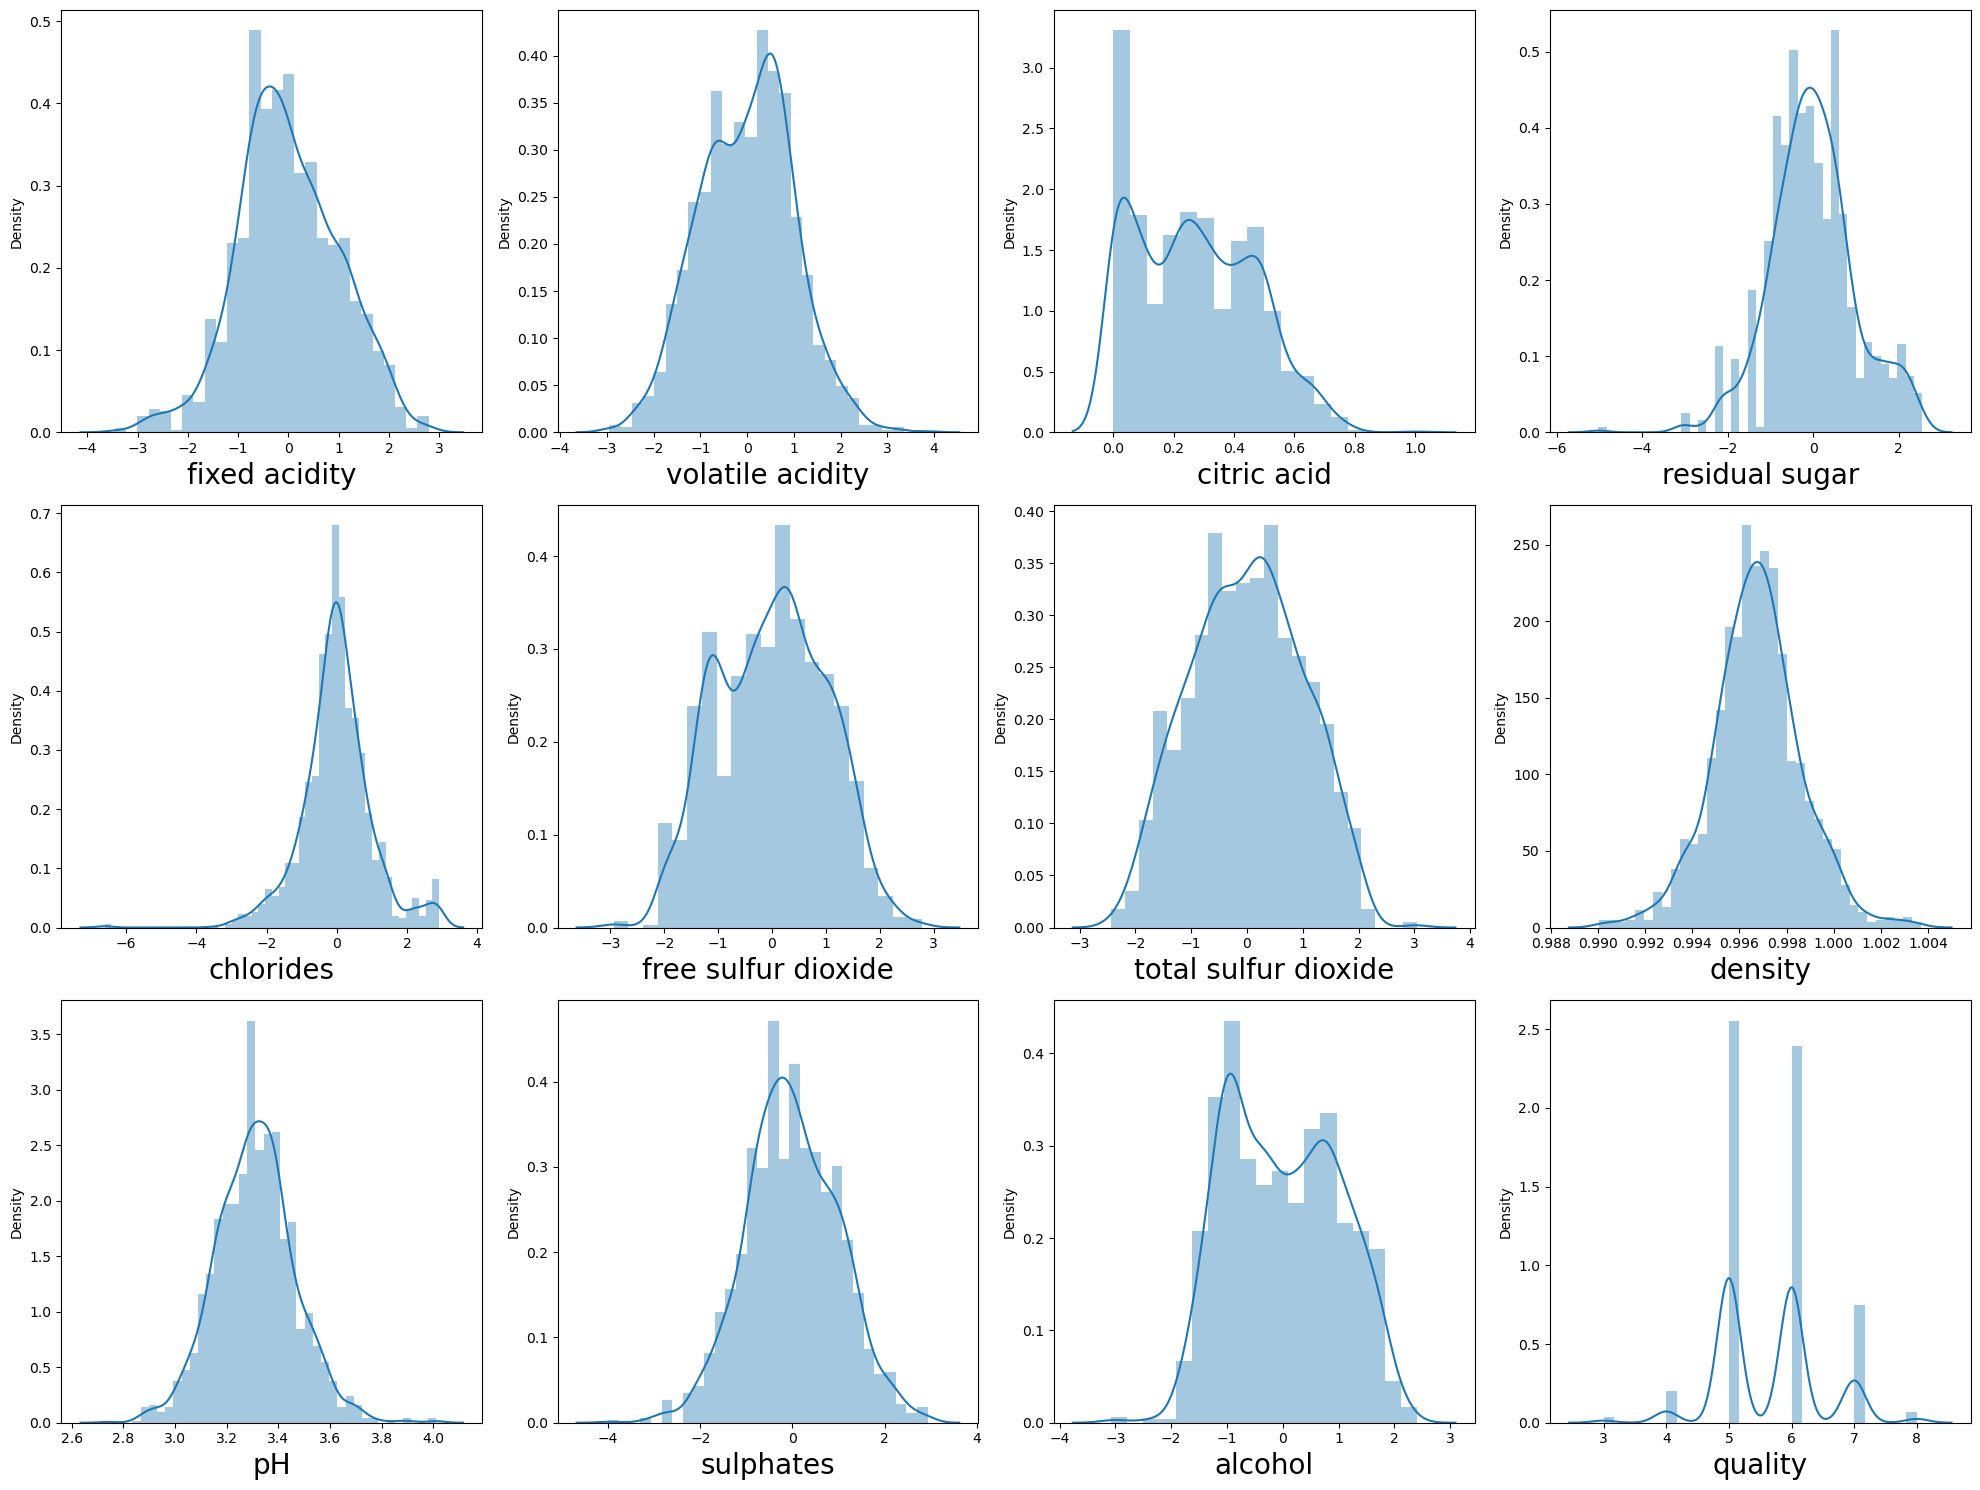

In [38]:
#lets see how data is distributed for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data4:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data4[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Observation
Now after using log transformation,cube root,sq root,power transformation technique,it is clearly visible that skewmess is reduced more in power transformation ,so we will keep that data.
Now again we will remove outliers

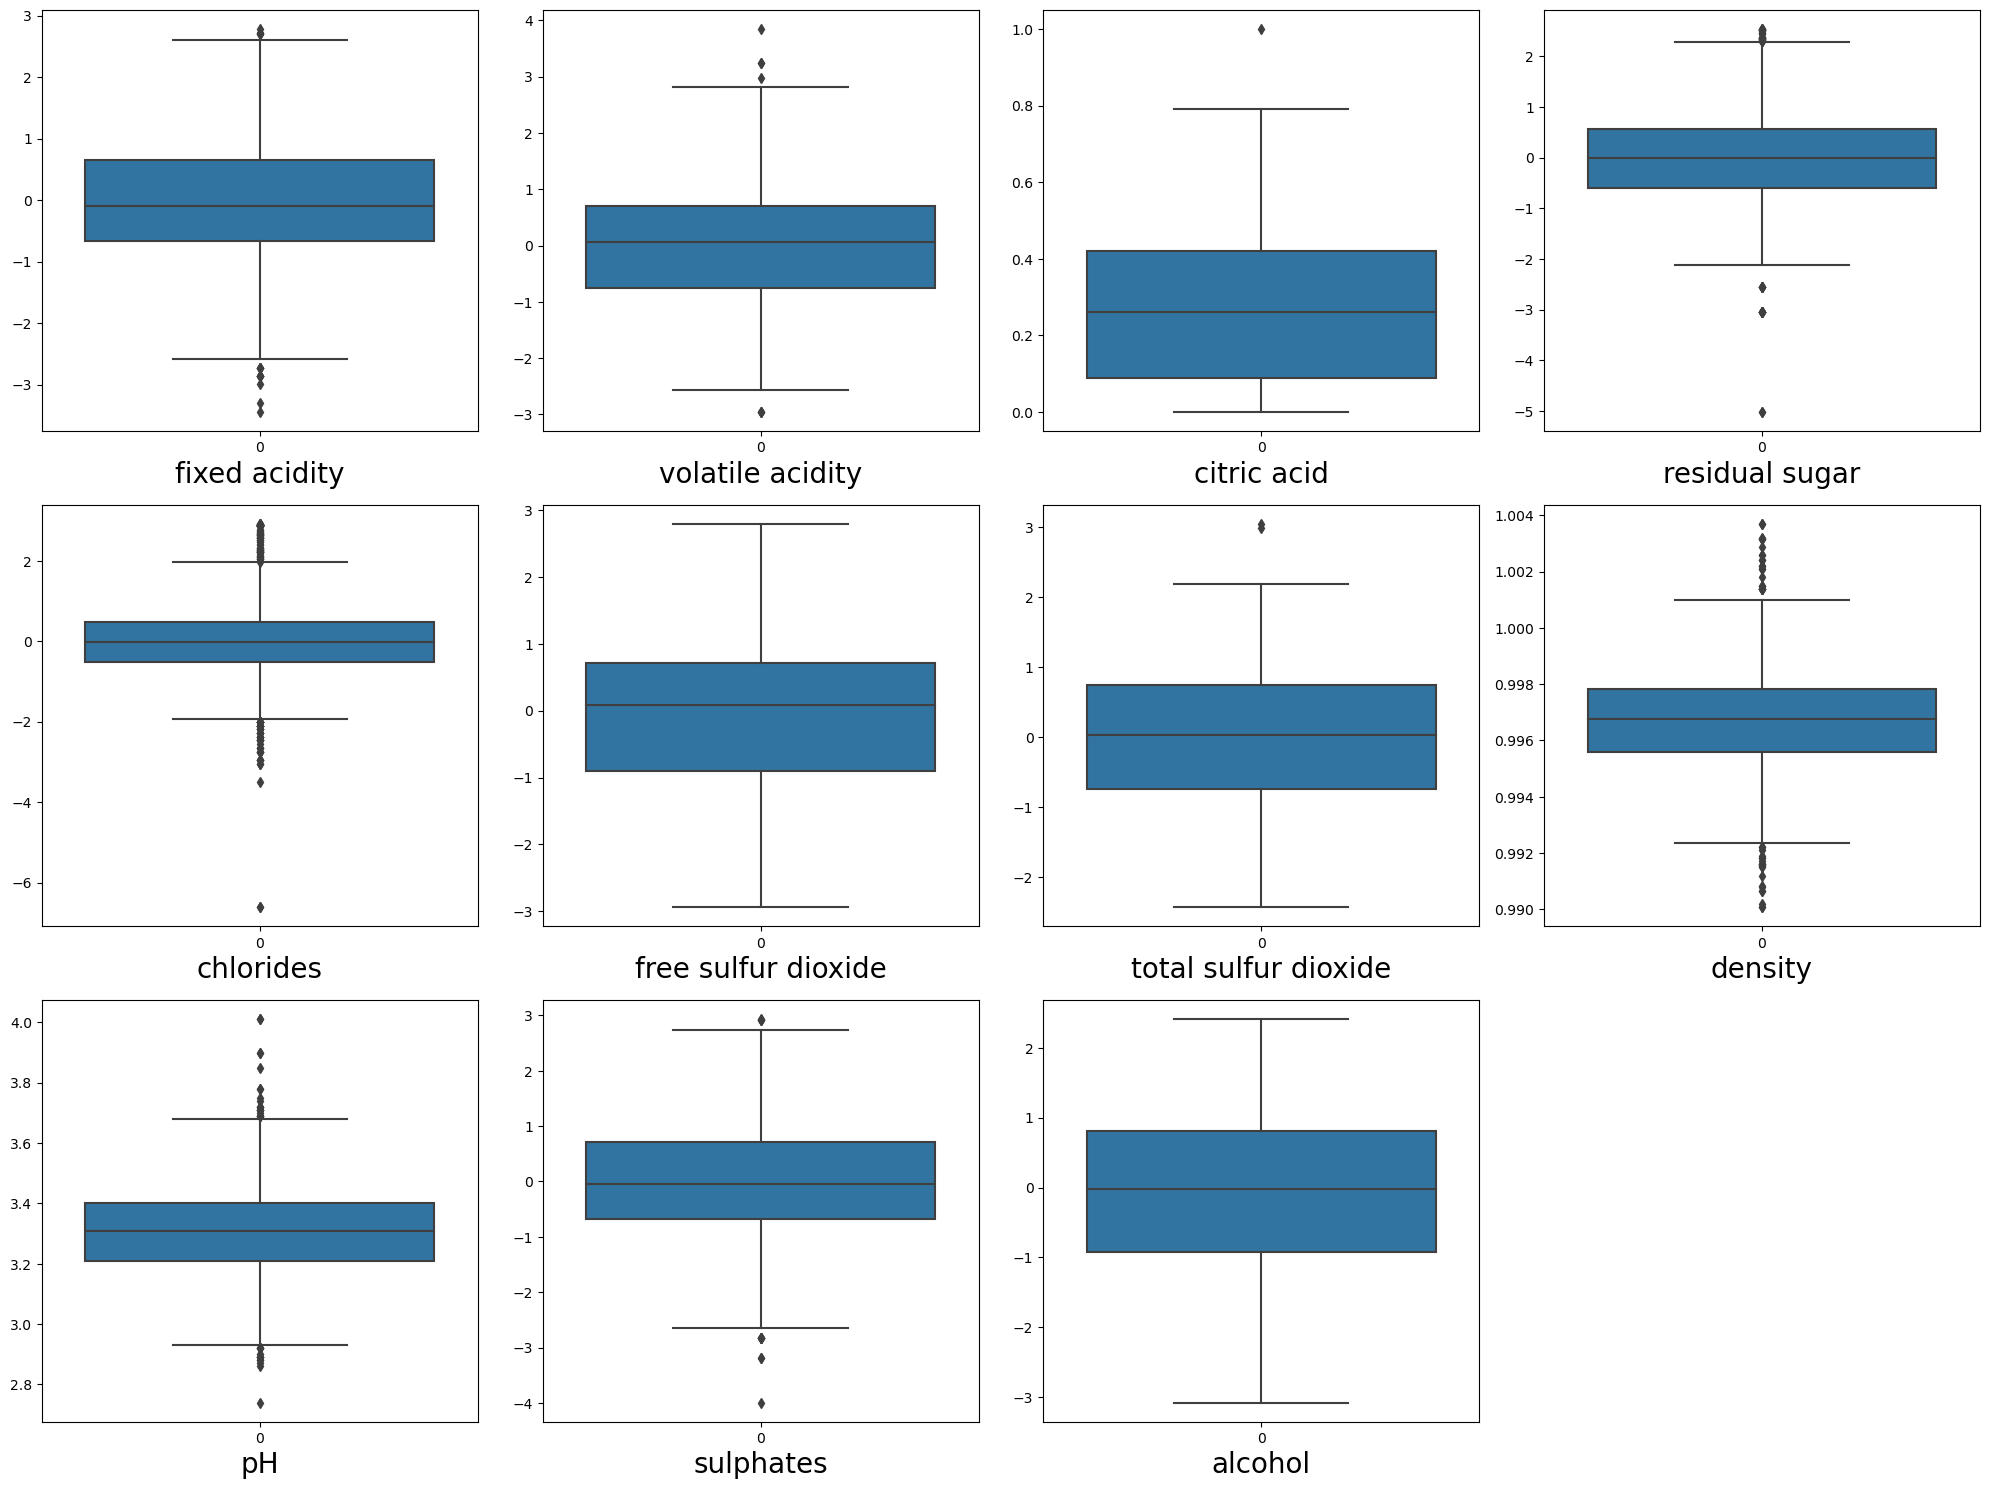

In [39]:
#lets see outliers for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in data4:
    if plotnumber<=11:
        plt.subplot(3,4,plotnumber)
        ax = sns.boxplot(data=data4[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [40]:
columns=data4[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates']]
z_score=np.abs(zscore(columns))
z_score

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates
0,0.442666,0.995542,1.391472,0.597145,0.172896,0.124411,0.558274,1.288643,0.581650
1,0.161308,1.771299,1.391472,0.556565,0.786204,0.854954,0.028261,0.719933,0.395140
2,0.161308,1.269801,1.186070,0.152372,0.560696,0.540394,0.134264,0.331177,0.183772
3,1.522582,1.550050,1.484154,0.597145,0.226113,0.693699,0.664277,0.979104,0.392318
4,0.442666,0.995542,1.391472,0.597145,0.172896,0.124411,0.558274,1.288643,0.581650
...,...,...,...,...,...,...,...,...,...
1594,1.461202,0.497996,0.980669,0.380998,0.480036,0.244351,0.978765,0.899886,0.392318
1595,1.767458,0.227895,0.877968,0.008632,1.013159,0.457504,0.862162,1.353436,0.874884
1596,1.364367,0.000387,0.723916,0.152372,0.172896,0.107498,0.533554,0.705508,0.820841
1597,1.767458,0.728553,0.775267,0.380998,0.226113,0.244351,0.676657,1.677400,0.588344


In [41]:
np.where(z_score>3)

(array([   7,   45,   45,   95,   95,  126,  127,  151,  151,  170,  198,
         442,  469,  480,  554,  555,  557,  608,  695,  695,  797,  836,
         836,  837,  837,  889,  909,  914, 1017, 1017, 1018, 1018, 1081,
        1111, 1114, 1269, 1270, 1287, 1299, 1300, 1316, 1316, 1321, 1321,
        1369, 1374, 1434, 1435, 1474, 1476, 1571], dtype=int64),
 array([3, 0, 7, 0, 7, 1, 1, 2, 7, 8, 3, 6, 3, 6, 6, 6, 6, 6, 4, 7, 4, 4,
        6, 4, 6, 6, 3, 3, 3, 6, 3, 6, 5, 7, 6, 6, 6, 8, 1, 7, 3, 7, 3, 7,
        8, 3, 6, 6, 6, 6, 4], dtype=int64))

In [42]:
entry1=data4[(z_score<3).all(axis=1)]
entry1.shape

(1558, 12)

In [43]:
print("Data Loss is:",((1599-1558)/1599)*100)

Data Loss is: 2.564102564102564


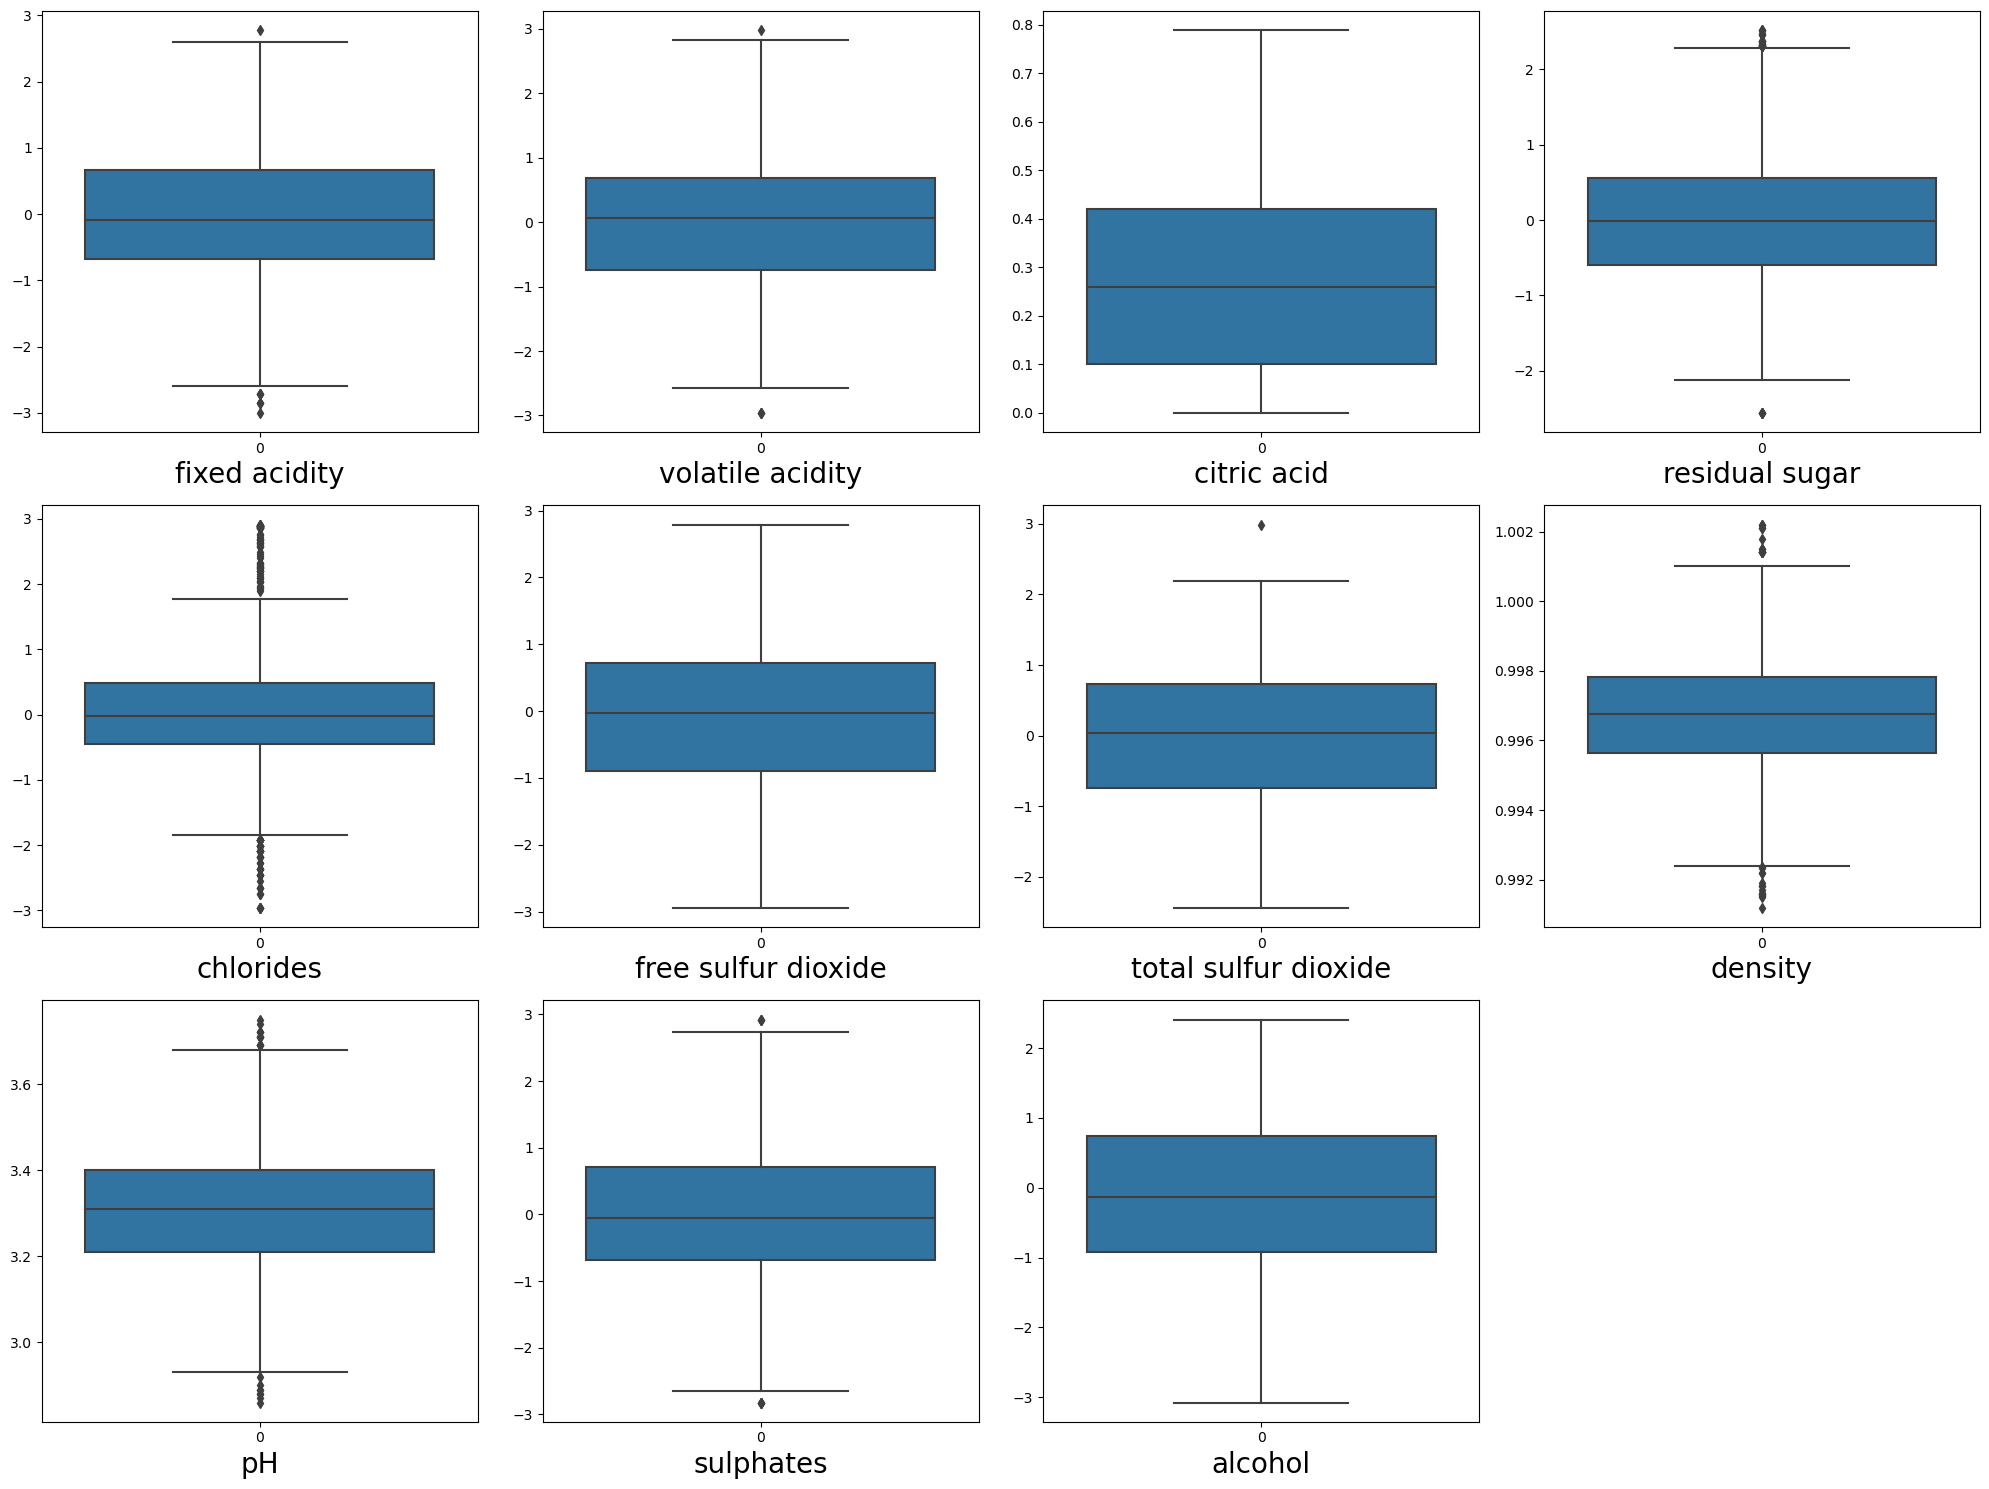

In [44]:
#lets see outliers for each column
plt.figure(figsize=(20,15))
plotnumber = 1
for col in entry1:
    if plotnumber<=11:
        plt.subplot(3,4,plotnumber)
        ax = sns.boxplot(data=entry1[col])
        plt.xlabel(col, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Now checking corelation between features and target

In [45]:
corr=entry1.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.279839,0.663314,0.182624,0.231469,-0.178161,-0.106124,0.663623,-0.704871,0.193685,-0.067313,0.125533
volatile acidity,-0.279839,1.000000,-0.577365,0.049806,0.128109,0.046090,0.115977,0.014738,0.228368,-0.332022,-0.220506,-0.389863
citric acid,0.663314,-0.577365,1.000000,0.154545,0.141803,-0.103183,-0.017596,0.364345,-0.535596,0.327757,0.116173,0.232311
residual sugar,0.182624,0.049806,0.154545,1.000000,0.152936,0.082091,0.149743,0.397247,-0.050428,0.016125,0.143413,0.040871
chlorides,0.231469,0.128109,0.141803,0.152936,1.000000,-0.005132,0.107139,0.376614,-0.263685,0.103742,-0.298679,-0.168341
free sulfur dioxide,-0.178161,0.046090,-0.103183,0.082091,-0.005132,1.000000,0.779081,-0.037765,0.113043,0.040137,-0.084849,-0.070733
total sulfur dioxide,-0.106124,0.115977,-0.017596,0.149743,0.107139,0.779081,1.000000,0.123637,-0.014201,0.017498,-0.269156,-0.203323
density,0.663623,0.014738,0.364345,0.397247,0.376614,-0.037765,0.123637,1.000000,-0.322063,0.145945,-0.449373,-0.167834
pH,-0.704871,0.228368,-0.535596,-0.050428,-0.263685,0.113043,-0.014201,-0.322063,1.000000,-0.109666,0.189601,-0.071887
sulphates,0.193685,-0.332022,0.327757,0.016125,0.103742,0.040137,0.017498,0.145945,-0.109666,1.000000,0.193874,0.355538


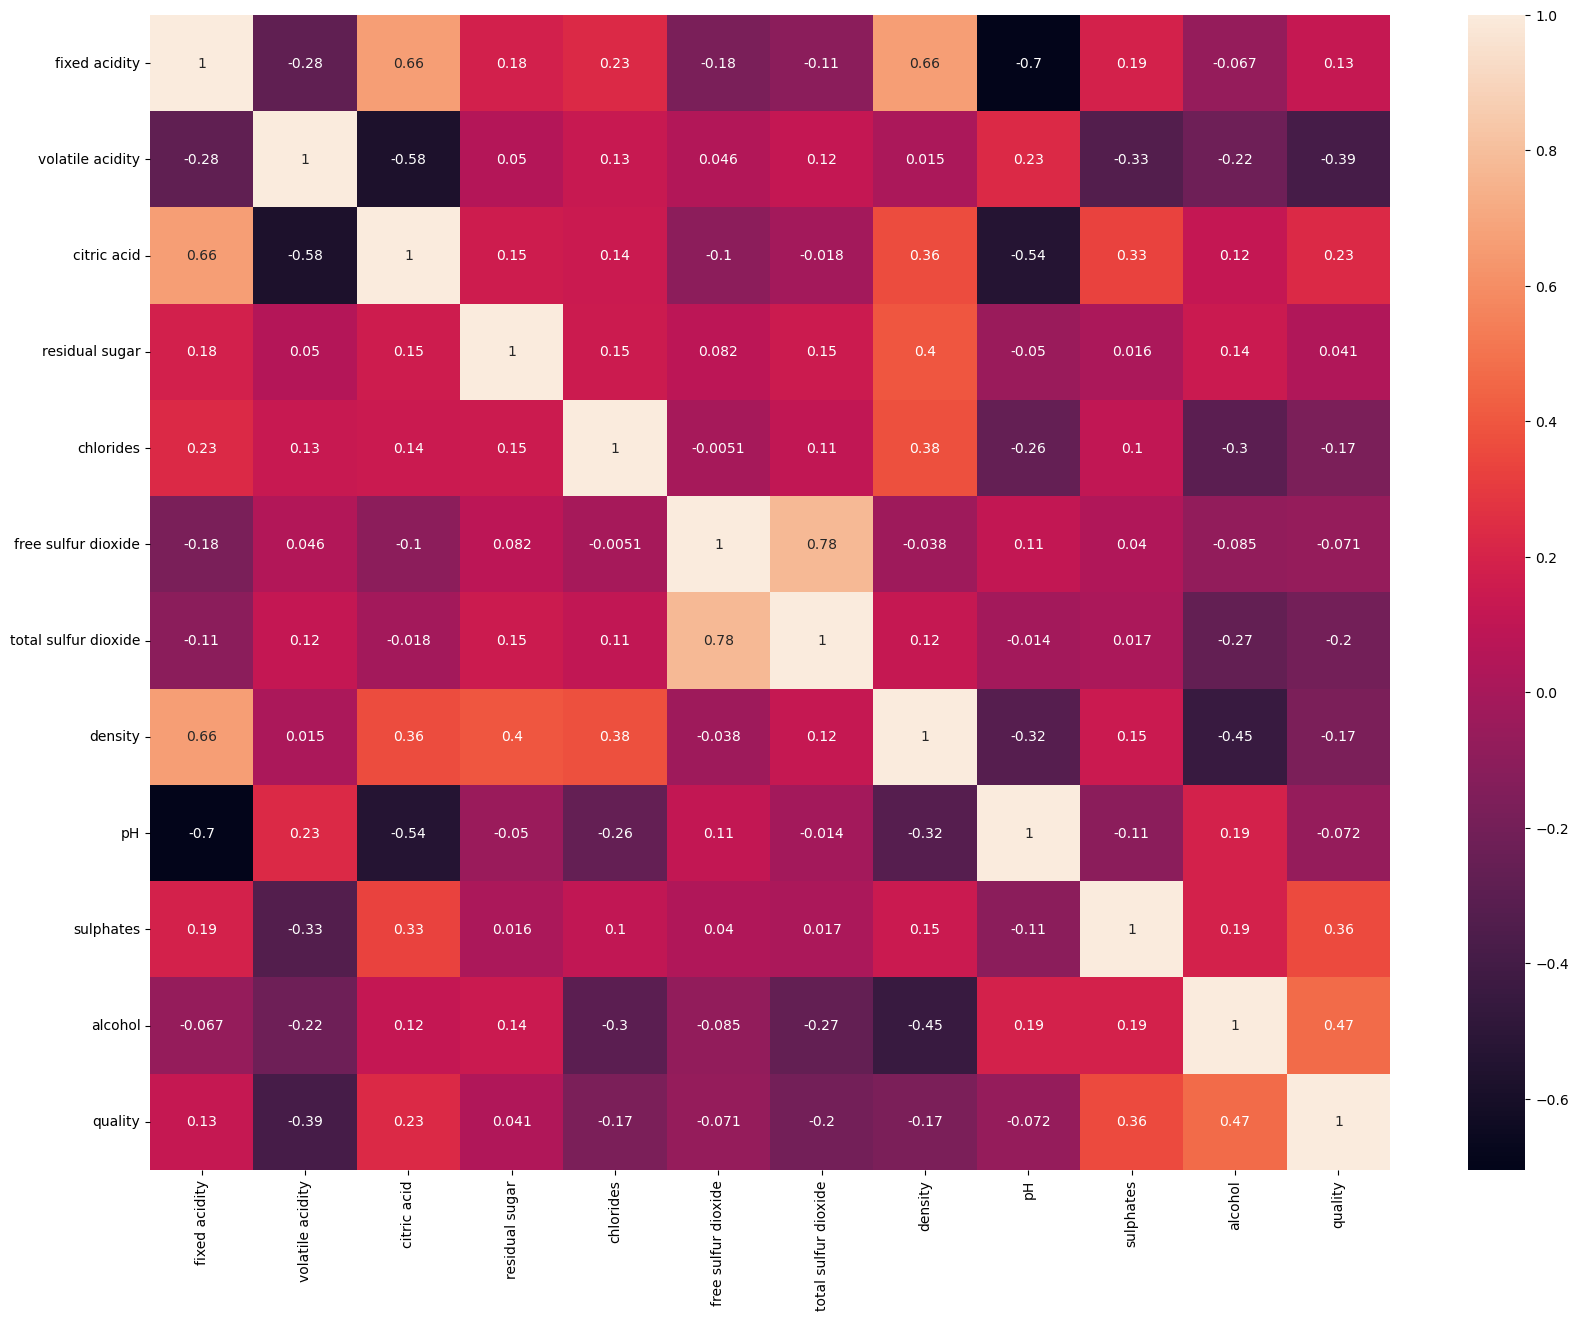

In [46]:
#Let's plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(entry1.corr(),annot=True)
plt.show()

# Observation
From heatmap we can visualize correlation between features and target,features and features.
1.fixed acidity,citric acid ,residual sugar,sulphates and alcohol have +ve relation with target variable.
2.volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxidedensity and ph have -ve relation with target variable.
3.also residual sugar have very less relation with target variable and we can drop if necessry.
4.Also colatile acidity and citric acid,ph and citric acid,density and fixed acidity have strong realtion with each other.It means multicollinearity problem exist.
We will solve it later.

In [47]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472791
sulphates               0.355538
citric acid             0.232311
fixed acidity           0.125533
residual sugar          0.040871
free sulfur dioxide    -0.070733
pH                     -0.071887
density                -0.167834
chlorides              -0.168341
total sulfur dioxide   -0.203323
volatile acidity       -0.389863
Name: quality, dtype: float64

In [48]:
entry1['quality'] = entry1['quality'].apply(lambda x: 1 if x >= 7 else 0)
entry1['quality'].value_counts()

0    1350
1     208
Name: quality, dtype: int64

# Now lets standarize our data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
#first lets separate features and labels
X=entry1.drop(columns=['quality'])
y=entry1['quality']

In [51]:
X.shape

(1558, 11)

In [116]:
#now lets standarize our data
scalar=StandardScaler()
X=scalar.fit_transform(X)
X.shape

(2700, 11)

# Now let's check for multicollinearity issue using vif

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']= X.columns
#let's check for value
vif

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Vif values are below 10,it means no need to remove any column and we can move ahead(this code ran before but as soon as i restarted my notebook it is giving error)

# Oversampling
As we can see data is imbalanced in target column,so we will use oversampling method to balance classes in target variable as our dataset is small.

In [55]:
#importing SMOTE
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [56]:
SM=SMOTE()
X,y=SM.fit_resample(X,y)

# Let's use select k best to select number of features

In [57]:
from sklearn.feature_selection import SelectKBest,f_classif

In [119]:
best_feat=SelectKBest(score_func=f_classif,k=10)
fit=best_feat.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(10,'Score'))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# as we have checked best features for 8,9,10.all are affecting in some way.so lets keep all features,now lets proceed ahead for model building(same issue as in vif)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [60]:
#lets split data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [61]:
y.value_counts()

0    1350
1    1350
Name: quality, dtype: int64

In [62]:
X.shape

(2700, 11)

In [63]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [64]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [65]:
metric_score(log,x_train,x_test,y_train,y_test,train=True)
metric_score(log,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:83.75%

===Test Result====
Accuracy Score:82.81%


Test Classification Report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       342
           1       0.82      0.84      0.83       333

    accuracy                           0.83       675
   macro avg       0.83      0.83      0.83       675
weighted avg       0.83      0.83      0.83       675



In [66]:
#LET'S BUILD OTHER MODELS TO CHECK TEST RESULT
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:92.49%

===Test Result====
Accuracy Score:89.63%


Test Classification Report
               precision    recall  f1-score   support

           0       1.00      0.80      0.89       342
           1       0.83      1.00      0.90       333

    accuracy                           0.90       675
   macro avg       0.91      0.90      0.90       675
weighted avg       0.91      0.90      0.90       675



In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:90.52%


Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       342
           1       0.91      0.90      0.90       333

    accuracy                           0.91       675
   macro avg       0.91      0.91      0.91       675
weighted avg       0.91      0.91      0.91       675



In [72]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [73]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [74]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:99.65%

===Test Result====
Accuracy Score:93.63%


Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       342
           1       0.93      0.95      0.94       333

    accuracy                           0.94       675
   macro avg       0.94      0.94      0.94       675
weighted avg       0.94      0.94      0.94       675



In [75]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:95.26%


Test Classification Report
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       342
           1       0.93      0.98      0.95       333

    accuracy                           0.95       675
   macro avg       0.95      0.95      0.95       675
weighted avg       0.95      0.95      0.95       675



In [77]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:88.49%

===Test Result====
Accuracy Score:88.30%


Test Classification Report
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       342
           1       0.88      0.89      0.88       333

    accuracy                           0.88       675
   macro avg       0.88      0.88      0.88       675
weighted avg       0.88      0.88      0.88       675



In [79]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [80]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:94.47%

===Test Result====
Accuracy Score:90.22%


Test Classification Report
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       342
           1       0.90      0.91      0.90       333

    accuracy                           0.90       675
   macro avg       0.90      0.90      0.90       675
weighted avg       0.90      0.90      0.90       675



In [81]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [82]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:90.86%

===Test Result====
Accuracy Score:88.44%


Test Classification Report
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       342
           1       0.87      0.91      0.89       333

    accuracy                           0.88       675
   macro avg       0.89      0.88      0.88       675
weighted avg       0.89      0.88      0.88       675



In [83]:
!pip install xgboost

In [84]:
import xgboost as xgb

In [85]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:95.85%


Test Classification Report
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       342
           1       0.94      0.98      0.96       333

    accuracy                           0.96       675
   macro avg       0.96      0.96      0.96       675
weighted avg       0.96      0.96      0.96       675



# Observation
from accuracy score , we can see that our xgboost model is giving best accuracy score for test result.
but lets check cross val score for each model

# Cross val score

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
score=cross_val_score(log,X,y,cv=5)

In [89]:
score.mean()

0.8114814814814814

In [90]:
Difference=(.8311)-score.mean()

In [91]:
Difference # cross val score for logistic regression model

0.01961851851851859

In [92]:
#now lets check for knn model
pred2=knn.predict(x_test)
score2=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; 0.043333333333333224


In [93]:
#now lets check for decision tree model
pred3=tree.predict(x_test)
score3=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; 0.02444444444444449


In [94]:
#now lets check for bagging model
pred4=bag.predict(x_test)
score4=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; 0.027407407407407436


In [95]:
#now lets check for random forest model
pred5=rand.predict(x_test)
score5=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.03629629629629627


In [96]:
#now lets check for ada boost model
pred6=ada.predict(x_test)
score6=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; 0.049259259259259225


In [97]:
#now lets check for gradient boost model
pred7=grad.predict(x_test)
score7=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; 0.029629629629629672


In [98]:
#now lets check for SVC model
pred8=support.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; 0.02111111111111119


In [99]:
#now lets check for xgb model
pred9=model.predict(x_test)
score9=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred9)-score9)

Difference is ; 0.09518518518518526


# observation
so from cross validation score ,it is very evident that random forest classifier is our best model which have accuracy score of 94.37% for test result. Now lets use hyper parameter tuning

# Using GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV

In [104]:
params={'n_estimators':[13,15,17,19,21,23,25],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,28,30],
       'min_samples_split':[10,11,12,13,15,16],
       'min_samples_leaf':[5,6,7,8,9,10]}
grd=GridSearchCV(rand,param_grid=params)
grd.fit(x_train,y_train)
print('Best_Parameters ',grd.best_params_)

Best_Parameters  {'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 19}


In [105]:
rand=grd.best_estimator_
rand.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=28, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=19)

In [106]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:97.19%

===Test Result====
Accuracy Score:92.44%


Test Classification Report
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       342
           1       0.90      0.96      0.93       333

    accuracy                           0.92       675
   macro avg       0.93      0.92      0.92       675
weighted avg       0.93      0.92      0.92       675



# Observation
So after using hyperparameter tuning i.e gridsearchcv our model performance is not increasing.
It means our model is performing well without tuning parameters.
Now lets plot roc curve and check auc score

In [107]:
from sklearn.metrics import roc_curve,roc_auc_score

In [108]:
fpr,tpr,thresholds=roc_curve(y_test,pred5)

In [109]:
print('threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False Positive Rate=',fpr)

threshold= [2 1 0]
True Positive Rate= [0.         0.98198198 1.        ]
False Positive Rate= [0.         0.07602339 1.        ]


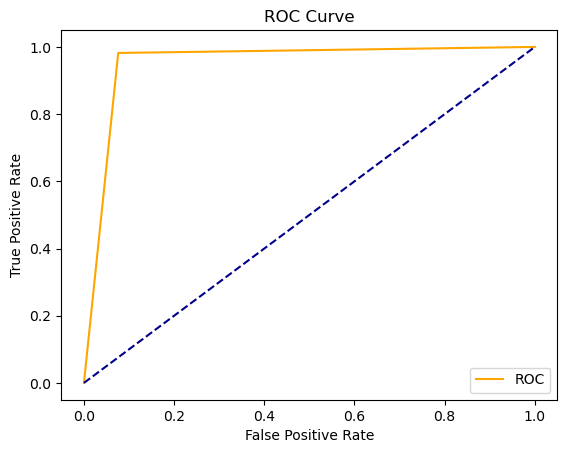

In [111]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
    

In [113]:
#Let's check auc score
auc_score=roc_auc_score(y_test,pred5)
print(auc_score*100)

95.29792950845582
